In [80]:
import math
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import itertools as itools
import matplotlib.pyplot as plt
sns.set_style("dark")

## Piecewise Aggregate Approximation (PAA)

This is an approximation of time-series X of length `n` into a vector of $\bar{X} = (\bar{x}_1,...,\bar{x}_M)$ of any arbitrary length $M \leq n$ where each of the value is calculated as:

$$
\bar{x}_i  = \frac{M}{n} \sum_{j=n/M(i-1)+1}^{(n/M)\cdot i)} x_j
$$

This is simply reducing the dimensionality from $n$ to $M$ where we divide the time-series into M equally sized frames and compute the mean values for each of the frame. The sequency assembled from the mean values is the PAA Approximation of the original time-series. The complexity isreduced by using the distance measure:

$$
D_{PAA}\left(\bar{X}, \bar{Y}\right) = \sqrt{\frac{n}{M}} \sqrt{\sum_{i=1}^{M}\left(\bar{x_i} - \bar{y_i}\right)}
$$

In [5]:
t1 = np.array([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34])
t2 = np.array([3.12, 2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34])

In [116]:
def paa(arr, sections):
    try:
        assert arr.shape[0] != sections
    except AssertionError as e:
        return np.copy(arr)
    else:
        if arr.shape[0] % sections == 0:
            sectionarr = np.array_split(arr, sections)
            res = np.array([item.mean() for item in sectionarr])
            res = np.array(
                [sample for item in res for sample in 
                [item.mean()] * item.shape[0]]
            )
        else:
            sectionarr = np.zeros(sections)
            space_size = np.arange(0, arr.shape[0] * sections - 1)
            outputIndex = space_size // arr.shape[0]
            inputIndex = space_size // sections
            uniques, nUniques = np.unique(outputIndex, return_counts=True)
            
            res = [arr[indices].sum() / arr.shape[0] for indices in
                   np.split(inputIndex, nUniques.cumsum())[:-1]]
            indices = ([row.mean() for row in np.split(inputIndex, nUniques.cumsum())[:-1]])
    return res

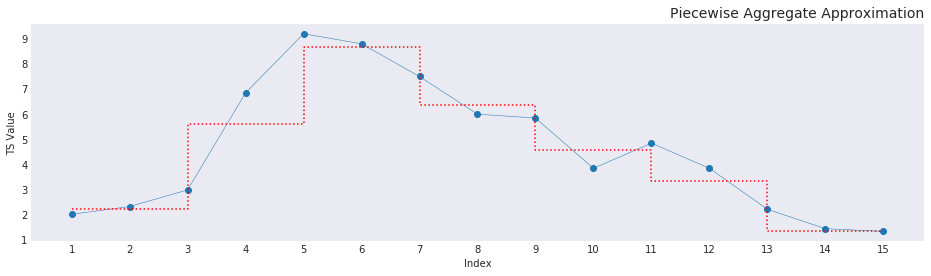

In [156]:
plt.figure(figsize=(16, 4))
plt.title("Piecewise Aggregate Approximation", size=14, loc="right")
plt.plot(range(1, 16), t1, marker="o", linewidth=0.5)
res = paa(t1, 7)
plt.step([1, 3, 5, 7, 9, 11, 13, 15], np.insert(res, 0, res[0]),
         color="red", linestyle=":")
plt.xticks(range(1, 16))
plt.xlabel("Index")
plt.ylabel("TS Value")
plt.savefig("./PAAStepFinal.png", bbox_inches="tight")
plt.show()

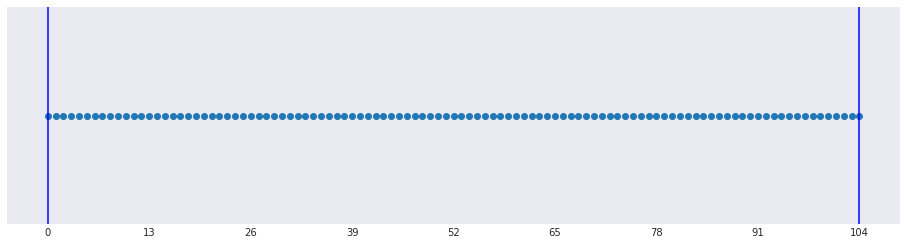

In [180]:
plt.figure(figsize=(16, 4))
plt.scatter(np.arange(0, t1.shape[0] * 7, 1), np.repeat(0, t1.shape[0] * 7))
plt.axvline(0, color="blue")
plt.axvline(104, color="blue")
plt.yticks([])
plt.xticks(range(0, 117, 13))
plt.savefig("./PAAStep01.png", bbox_inches="tight")
plt.show()